In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib notebook

TICKER = "HG=F"

In [13]:
ticker = yf.Ticker(TICKER).history(period="max")
ticker = ticker.loc[:, ["Close"]]
ticker.columns = ['close']
ticker.index.name = 'date'
ticker['dailyReturn'] = ticker['close'].pct_change()
ticker['sd'] = ticker.dailyReturn.rolling(252).std()
ticker['z'] =  abs(ticker.dailyReturn) / ticker.sd
ticker

,close,dailyReturn,sd,z
date,,,,
2000-08-30,0.8850,NaN,NaN,NaN
2000-08-31,0.8850,0.000000,NaN,NaN
2000-09-01,0.8890,0.004520,NaN,NaN
2000-09-05,0.9060,0.019123,NaN,NaN
2000-09-06,0.9015,-0.004967,NaN,NaN
...,...,...,...,...
2022-05-26,4.2550,-0.005144,0.015872,0.324077
2022-05-27,4.3040,0.011516,0.015887,0.724852
2022-05-31,4.2950,-0.002091,0.015866,0.131794


In [12]:
ticker.loc[abs(ticker['dailyReturn']) > .05,:]

,close,dailyReturn,sd,z
date,,,,
2002-01-07,0.7095,0.058955,0.012341,4.777367
2002-01-31,0.7305,0.052594,0.012218,4.304565
2003-12-01,0.9555,0.053473,0.012803,4.176641
2004-03-03,1.3010,-0.051058,0.013921,3.667658
2004-04-21,1.2335,-0.063402,0.015044,4.214309
...,...,...,...,...
2015-09-08,2.4385,0.051304,0.013821,3.711914
2020-03-18,2.1605,-0.066940,0.011581,5.780414
2020-10-01,2.8635,-0.054482,0.013858,3.931543


<IPython.core.display.Javascript object>


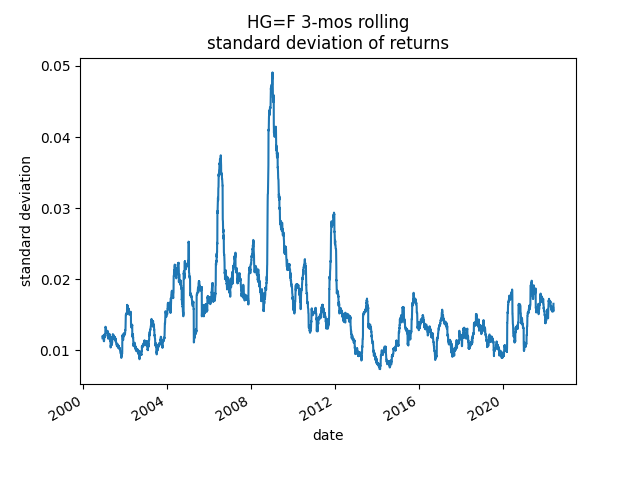

<AxesSubplot:title={'center':'HG=F 3-mos rolling\nstandard deviation of returns'}, xlabel='date', ylabel='standard deviation'>

In [5]:
fig1, ax1 = plt.subplots()
plt.ylabel("standard deviation")
titlestr = TICKER + " 3-mos rolling\nstandard deviation of returns"
plt.title(titlestr)
ticker.sd.plot(ax=ax1)

In [4]:
tickerm = pd.DataFrame(ticker.dailyReturn.resample("W").apply(lambda x: ((x + 1).cumprod() - 1).last("D")))
tickerm.rename(columns={'dailyReturn': 'weeklyReturn'}, inplace=True)
tickerm['sd'] = tickerm.weeklyReturn.rolling(13).std() * math.sqrt(52)


<IPython.core.display.Javascript object>


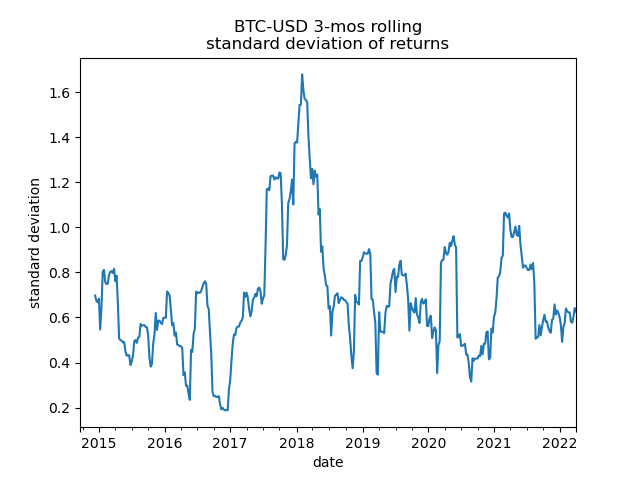

<AxesSubplot:title={'center':'BTC-USD 3-mos rolling\nstandard deviation of returns'}, xlabel='date', ylabel='standard deviation'>

In [5]:
fig1, ax1 = plt.subplots()
plt.ylabel("standard deviation")
titlestr = TICKER + " 3-mos rolling\nstandard deviation of returns"
plt.title(titlestr)
tickerm.sd.plot(ax=ax1)

In [6]:
def upDays(x):
    index = ticker.index.get_loc(x.name)
    if index == 0:
        return 0
    prev_x = ticker.iloc[index-1]
    if x['dailyReturn'] <= 0:
        return 0
    else:
        return upDays(prev_x) + 1


In [7]:
ticker['upDays'] = ticker.apply(upDays, axis=1)
ticker

,close,dailyReturn,sd,upDays
date,,,,
2014-09-17,457.334015,NaN,NaN,0
2014-09-18,424.440002,-0.071926,NaN,0
2014-09-19,394.795990,-0.069843,NaN,0
2014-09-20,408.903992,0.035735,NaN,1
2014-09-21,398.821014,-0.024659,NaN,0
...,...,...,...,...
2022-03-25,44348.730469,0.008821,0.593926,4
2022-03-26,44500.828125,0.003430,0.587486,5
2022-03-27,46820.492188,0.052126,0.591962,6


In [11]:
ticker.loc[ticker.upDays >= 8,:]

,close,dailyReturn,sd,upDays
date,,,,
2015-10-29,313.855011,0.030323,0.237950,8
2015-10-30,328.015015,0.045116,0.246283,9
2017-05-06,1578.800049,0.015012,0.576991,8
2017-05-07,1596.709961,0.011344,0.577069,9
2017-05-08,1723.349976,0.079313,0.596233,10
2017-05-09,1755.359985,0.018574,0.589927,11
2017-05-10,1787.130005,0.018099,0.574609,12
2017-05-11,1848.569946,0.034379,0.574777,13
2017-10-12,5446.910156,0.128547,0.829107,8


In [9]:
ticker['1950':'1986'].loc[ticker.sd > 0.3]

,close,dailyReturn,sd,upDays
date,,,,


In [10]:
ticker['2020':'2022'].loc[ticker.sd > 0.3]

,close,dailyReturn,sd,upDays
date,,,,
2020-01-01,7200.174316,0.000914,0.382592,1
2020-01-02,6985.470215,-0.029819,0.386107,0
2020-01-03,7344.884277,0.051452,0.401260,1
2020-01-04,7410.656738,0.008955,0.401497,2
2020-01-05,7411.317383,0.000089,0.401351,3
...,...,...,...,...
2022-03-25,44348.730469,0.008821,0.593926,4
2022-03-26,44500.828125,0.003430,0.587486,5
2022-03-27,46820.492188,0.052126,0.591962,6
